# Demo of Coreference Resolution Model Test

First we define the model, that we want to test. For this demo it will be _XLM-R Coref_ - mainly becasue this is the only existing Danish coref model to our knowledge.

In [1]:
!bash coref_setup.sh

PREFIX=/work/miniconda3
Unpacking payload ...
                                                                                
Installing base environment...



Preparing transaction: done
Executing transaction: done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /work/miniconda3


In [2]:
!eval "$(/work/miniconda3/bin/conda shell.bash hook)"
!conda install -c conda-forge jsonnet -y
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download da_core_news_sm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - jsonnet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    jsonnet-0.20.0             |  py310heca2aa9_0         401 KB  conda-forge
    openssl-3.1.1              |       hd590300_1         2.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

In [3]:
!pip install -r coref_requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 9.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 32.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 13.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━

In [4]:
model_name = "xlm-r coref"
from danlp.models import load_xlmr_coref_model
model = load_xlmr_coref_model() 

100% |########################################################################|


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Use coarse to fine: True


## WinoBias Coreference Task

In [9]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# import the evaluator
from genda_lens.genda_lens import Evaluator
eval = Evaluator(model_name= model_name)

[INFO] You can test xlm-r coref by running Evaluator.evaluate_<model type>()


In [13]:
output = eval.evaluate_coref(test= "dawinobias", model = model)

[nltk_data] Downloading package omw-1.4 to /home/ucloud/nltk_data...
/opt/conda/lib/python3.10/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'da_core_news_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.3.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[INFO] Running the DaWinobias coreference task on xlm-r coref


NameError: name 'progressbar' is not defined

In [4]:
# save output in two variables
condensed_output, detailed_output = output[0], output[1]
detailed_output

Detailed Output for xlm-r coref,,DaWinoBias,,
Gender Effect Size,,-0.16,,
Condition,Anti-stereotypical,,Pro-stereotypical,
Accuracy,0.57,,0.51,
Pronouns,Female,Male,Female,Male
F1,0.51,0.62,0.4,0.59


In [5]:
#get the visualizer
from evalda_pub2 import Visualizer
viz = Visualizer()

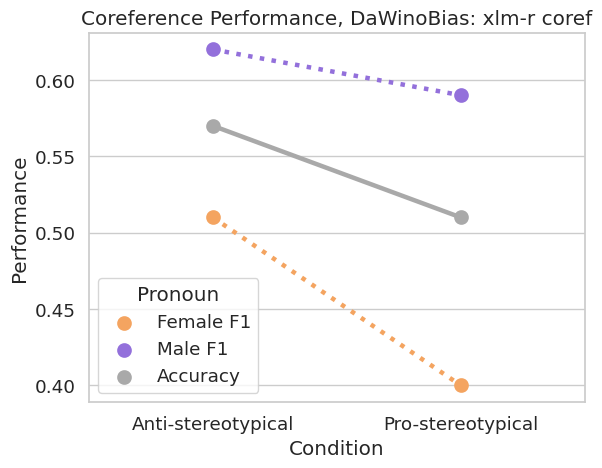

In [6]:
plot_wino= viz.vizualize_results(detailed_output, framework ="dawinobias", model_name = model_name, task = "coref")

In [ ]:
#the plot can be saved as an image
plot_winot.savefig(f"coref_plot_{model_name}.png", dpi=300, bbox_inches='tight')

## ABC Coreference Task

Since we have already specified model name and the evaluator class and the visualizer, we can just go ahead. 

In [7]:
output_abc = eval.evaluate_coref(task="abc", model = model)

Running the coreference model on the ABC dataset. First on the female-stereotypical sentences, and secondly on the male-stereotypical sentences.


100% |########################################################################|



    Total positive prediction of coreference clusters: 
    
    Female: 2123
    Male: 2016
    Reflexive: 2206
    Total predictions:  2280 2280 2280

    Total positive prediction of coreference clusters: 
    
    Female: 1895
    Male: 2098
    Reflexive: 2203
    Total predictions:  2280 2280 2280

    Total positive prediction of coreference clusters: 
    
    Female: 4018
    Male: 4114
    Reflexive: 4409
    Total predictions:  4560 4560 4560


In [8]:
simple_output, detailed_output = output_abc[0], output_abc[1]
detailed_output

Detailed Output for xlm-r coref,,,ABC,,,
Gender Effect Size,,,0.03,,,
Pronoun,,Female,,Male,,Reflexive
Mean Rate of Detected Clusters,,0.88114,,0.902193,,0.966886
Stereotypical Occupation,Female,Male,Female,Male,Female,Male
Rate of Detected Clusters,0.93114,0.83114,0.884211,0.920175,0.967544,0.966228


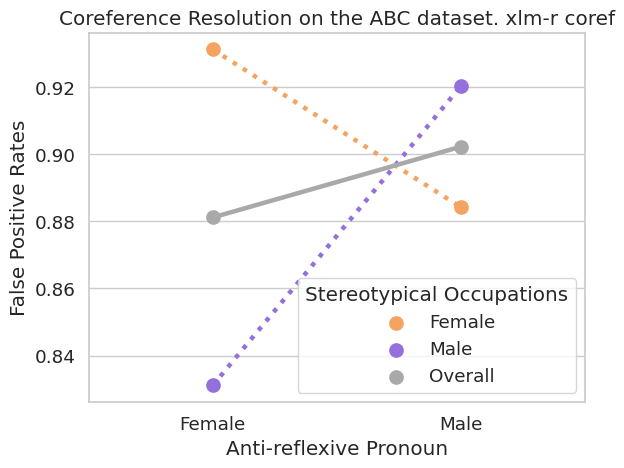

In [9]:
plot_abc = viz.vizualize_results(detailed_output, framework ="abc", task = "coref", model_name = model_name)